# Radar & Pizza Plots

A radar plot or a pizza plot are ways of visualizing data in a circular manner. 

You'll see them commonly used when comparing different metrics of a player or team.

It's really common to use them to compare percentiles of a player in different metrics or compare two players against each other.

In [150]:
# Lets get our data from fbref
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'stats_standard'})[0]

In [151]:
df.head(10)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   
5                  6    Laurent Abergel             fr FRA                 MF   
6                  7     Matthis Abline             fr FRA                 FW   
7                  8              Abner             br BRA                 DF   
8                  9  Zakaria Aboukhlal             ma MAR              MF,FW   
9                 10        Abdel Abqar             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-043   
1       Union Berlin       de Bundesliga             23-117   
2     Eint Frankfurt       de Bundesliga             20-174   
3              Reims          fr Ligue 1             36-141   
4               Lens          fr Ligue 1             23-327   
5            Lorient          fr Ligue 1             31-015   
6             Nantes          fr Ligue 1             20-325   
7              Betis          es La Liga             23-265   
8           Toulouse          fr Ligue 1             23-363   
9             Alavés          es La Liga             24-343   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           14     12  ...           0.08  0.08  0.00   
1               2000           17      5  ...           0.00  0.00  0.00   
2               2003            7      1  ...           0.89  0.89  0.00   
3               1987           18     18  ...           0.00  0.17  0.17   
4               2000           20     14  ...           0.00  0.00  0.00   
5               1993           21     21  ...           0.05  0.10  0.05   
6               2003           12      5  ...           0.00  0.20  0.20   
7               2000           17     13  ...           0.00  0.00  0.00   
8               2000            5      4  ...           0.00  0.72  0.48   
9               1999           15     15  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.08  0.00  0.07   0.07  0.00     0.07             Matches  
1   0.00  0.05  0.10   0.14  0.05     0.14             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.17  0.12  0.01   0.14  0.12     0.14             Matches  
4   0.00  0.06  0.04   0.09  0.06     0.09             Matches  
5   0.10  0.03  0.05   0.08  0.03     0.08             Matches  
6   0.20  0.16  0.30   0.46  0.16     0.46             Matches  
7   0.00  0.01  0.04   0.05  0.01     0.05             Matches  
8   0.48  0.52  0.04   0.56  0.33     0.37             Matches  
9   0.00  0.02  0.00   0.02  0.02     0.02             Matches  

[10 rows x 38 columns]

In [152]:
# You might notice that the column names are a bit weird, let's fix that

# We'll get rid of the per 90 columns and we will recalculate the ones we are interested in
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]


In [153]:
df.head(10)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   
5                  6    Laurent Abergel             fr FRA                 MF   
6                  7     Matthis Abline             fr FRA                 FW   
7                  8              Abner             br BRA                 DF   
8                  9  Zakaria Aboukhlal             ma MAR              MF,FW   
9                 10        Abdel Abqar             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-043   
1       Union Berlin       de Bundesliga             23-117   
2     Eint Frankfurt       de Bundesliga             20-174   
3              Reims          fr Ligue 1             36-141   
4               Lens          fr Ligue 1             23-327   
5            Lorient          fr Ligue 1             31-015   
6             Nantes          fr Ligue 1             20-325   
7              Betis          es La Liga             23-265   
8           Toulouse          fr Ligue 1             23-363   
9             Alavés          es La Liga             24-343   

  Unnamed: 7_level_0 Playing Time         ... Performance      Expected       \
                Born           MP Starts  ...        CrdY CrdR       xG npxG   
0               2000           14     12  ...           1    0      0.0  0.0   
1               2000           17      5  ...           3    1      0.2  0.2   
2               2003            7      1  ...           0    0      0.1  0.1   
3               1987           18     18  ...           3    0      2.2  2.2   
4               2000           20     14  ...           2    0      0.8  0.8   
5               1993           21     21  ...           2    0      0.6  0.6   
6               2003           12      5  ...           0    0      0.8  0.8   
7               2000           17     13  ...           3    0      0.1  0.1   
8               2000            5      4  ...           0    0      2.2  1.4   
9               1999           15     15  ...           5    0      0.3  0.3   

                Progression           Unnamed: 37_level_0  
   xAG npxG+xAG        PrgC PrgP PrgR             Matches  
0  0.8      0.8          19   40   22             Matches  
1  0.5      0.7           8   10   26             Matches  
2  0.1      0.2           2    5    7             Matches  
3  0.2      2.4          25   87    4             Matches  
4  0.5      1.3           7   70   17             Matches  
5  1.1      1.6          17  101   31             Matches  
6  1.5      2.3           7    6   44             Matches  
7  0.6      0.7          13   28   54             Matches  
8  0.2      1.6          12   12   35             Matches  
9  0.0      0.3           3   35    0             Matches  

[10 rows x 28 columns]

In [154]:
# This will get rid of the first level of the multiindex on the columns
df = df.droplevel(0, axis=1)

In [155]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-043,2000,14,12,...,1,0,0.0,0.0,0.8,0.8,19,40,22,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,23-117,2000,17,5,...,3,1,0.2,0.2,0.5,0.7,8,10,26,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-174,2003,7,1,...,0,0,0.1,0.1,0.1,0.2,2,5,7,Matches
3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-141,1987,18,18,...,3,0,2.2,2.2,0.2,2.4,25,87,4,Matches
4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-327,2000,20,14,...,2,0,0.8,0.8,0.5,1.3,7,70,17,Matches
5,6,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,31-015,1993,21,21,...,2,0,0.6,0.6,1.1,1.6,17,101,31,Matches
6,7,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,20-325,2003,12,5,...,0,0,0.8,0.8,1.5,2.3,7,6,44,Matches
7,8,Abner,br BRA,DF,Betis,es La Liga,23-265,2000,17,13,...,3,0,0.1,0.1,0.6,0.7,13,28,54,Matches
8,9,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23-363,2000,5,4,...,0,0,2.2,1.4,0.2,1.6,12,12,35,Matches
9,10,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,24-343,1999,15,15,...,5,0,0.3,0.3,0.0,0.3,3,35,0,Matches


In [156]:
# We Are only going to be looking at FWs so we will filter the data to only include those players
# As well we only want to be looking at player who have played more than 400 minutes

# The reason we are only looking at FWs is because we want to compare players who play in similar positions
# The reason we are only looking at players who have played more than 400 minutes is because we want to compare players who have played a significant amount of time and we don't want to inflate stats of players by comparing them to players who have played very little
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min'].astype(int) > 400]
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,23-117,2000,17,5,...,3,1,0.2,0.2,0.5,0.7,8,10,26,Matches
6,7,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,20-325,2003,12,5,...,0,0,0.8,0.8,1.5,2.3,7,6,44,Matches
14,15,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24-018,2000,20,20,...,2,0,9.8,9.8,1.1,10.9,29,14,100,Matches
18,19,Elijah Adebayo,eng ENG,FW,Luton Town,eng Premier League,26-040,1998,23,13,...,1,0,5.6,5.6,0.7,6.3,14,19,85,Matches
20,21,Simon Adingra,ci CIV,"FW,MF",Brighton,eng Premier League,22-046,2002,17,13,...,2,0,2.4,2.4,2.1,4.5,53,22,132,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,2642,Duván Zapata,co COL,FW,Torino,it Serie A,32-321,1991,20,19,...,0,0,6.3,6.3,2.3,8.6,43,28,143,Matches
2750,2646,Bryan Zaragoza,es ESP,"MF,FW",Granada,es La Liga,22-297,2001,21,18,...,5,0,3.8,3.0,3.3,6.3,100,36,127,Matches
2763,2658,Edon Zhegrova,xk KVX,FW,Lille,fr Ligue 1,24-322,1999,20,17,...,1,0,4.0,4.0,4.8,8.8,78,61,205,Matches
2768,2663,Joshua Zirkzee,nl NED,FW,Bologna,it Serie A,22-270,2001,23,22,...,5,0,6.9,6.1,3.1,9.2,33,59,130,Matches


In [157]:
# Now let's calculate the percentiles for each player in the columns we're interested in
# We can calculate the percentiles using the .rank() method

# Let's look at the columns we are interested in
df[['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].head(10)

# let's also make sure that the columns are of the correct type
df[['90s', 'xG', 'xAG']] = df[['90s', 'xG', 'xAG']].astype(float)
df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [158]:
# Now let's calculate the per 90 stats for each of these columns
# But we will name them as we want to see them in the radar plot
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [183]:
# We'll calculate the percentiles for each of these columns
# We will also name them as we want to see them in the radar plot
df['Goals'] = (df['goals_per_90'].rank(pct=True) * 100).astype(int)
df['Assists'] = (df['assists_per_90'].rank(pct=True) * 100).astype(int)
df['Goals + Assists'] = (df['goals_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Expected Goals'] = (df['expected_goals_per_90'].rank(pct=True)  * 100).astype(int)
df['Expected Assists'] = (df['expected_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Carries'] = (df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Passes'] = (df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Receptions'] = (df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)

### Now that we have our data, lets start by plotting a radar plot for a single player

In [184]:
from mplsoccer import Radar

In [185]:
# Let's plot a radar for Mbappe
mbappe = df[df['Player'] == 'Kylian Mbappé']
mbappe

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1639,1577,Kylian Mbappé,fr FRA,FW,Paris S-G,fr Ligue 1,25-058,1998,19,18,...,4.94382,11.516854,99,76,99,99,79,91,89,96


In [186]:
columns_to_plot = [
    'Goals', 'Assists', 'Goals + Assists', 'Expected Goals', 
    'Expected Assists', 'Progressive Carries', 'Progressive Passes', 'Progressive Receptions'
]

# If there was a stat that meant having a lower value was better we can use the parameter
# lower_is_better to make the radar plot reflect that
# example: lower_is_better=['Goals Conceded']
# And then add that parameter to the Radar object

radar = Radar(
    # These are the columns we want to plot
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],# Since we are plotting percentiles the minimum value is 0
    max_range=[100 for _ in columns_to_plot], # The maximum value is the maximum percentile
    # lower_is_better=lower_is_better
)

Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ')

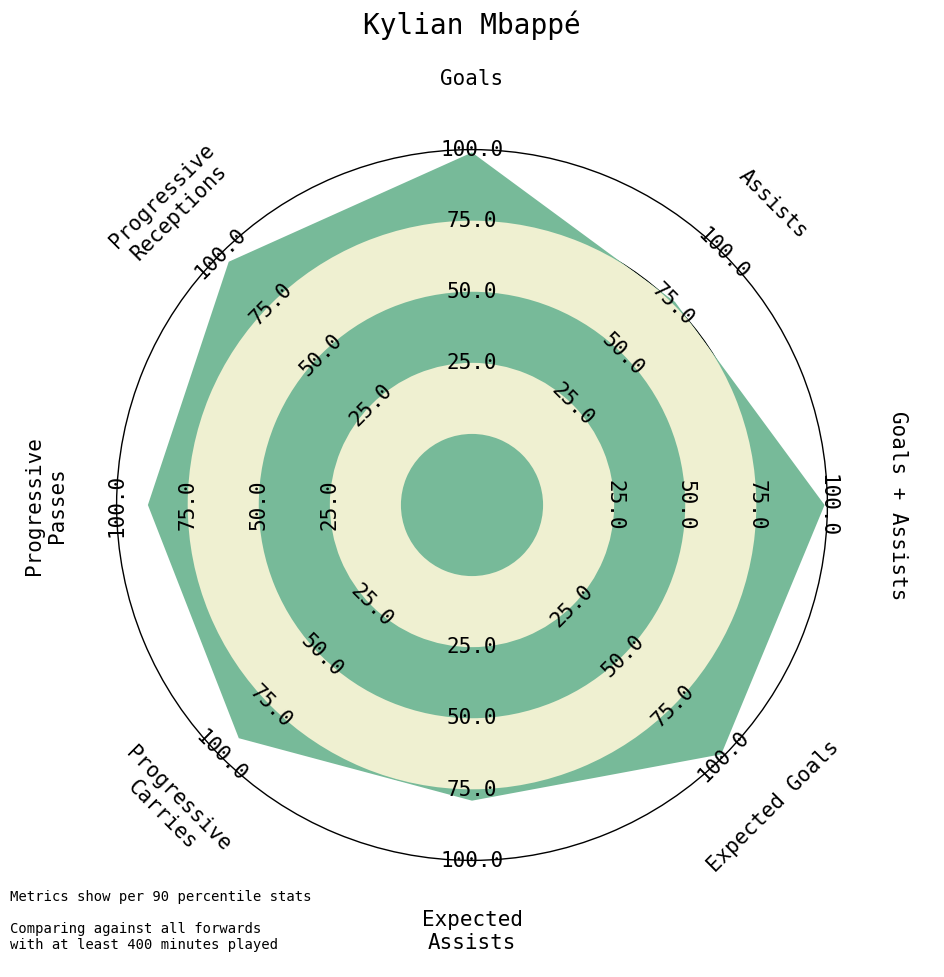

In [187]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar(
    ax=ax,
    values=mbappe[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#77BA99'},
    kwargs_rings={'facecolor': '#EFF0D1'}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)
# draw the range labels
param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.5, y=1.02, s='Kylian Mbappé', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [188]:
# Now let's compare two players
# We'll compare Mbappe and Haaland
haaland = df[df['Player'] == 'Erling Haaland']
haaland

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1048,1009,Erling Haaland,no NOR,FW,Manchester City,eng Premier League,23-210,2000,18,17,...,0.727273,3.939394,99,88,99,100,82,11,3,10


Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played\n@mckayjohns')

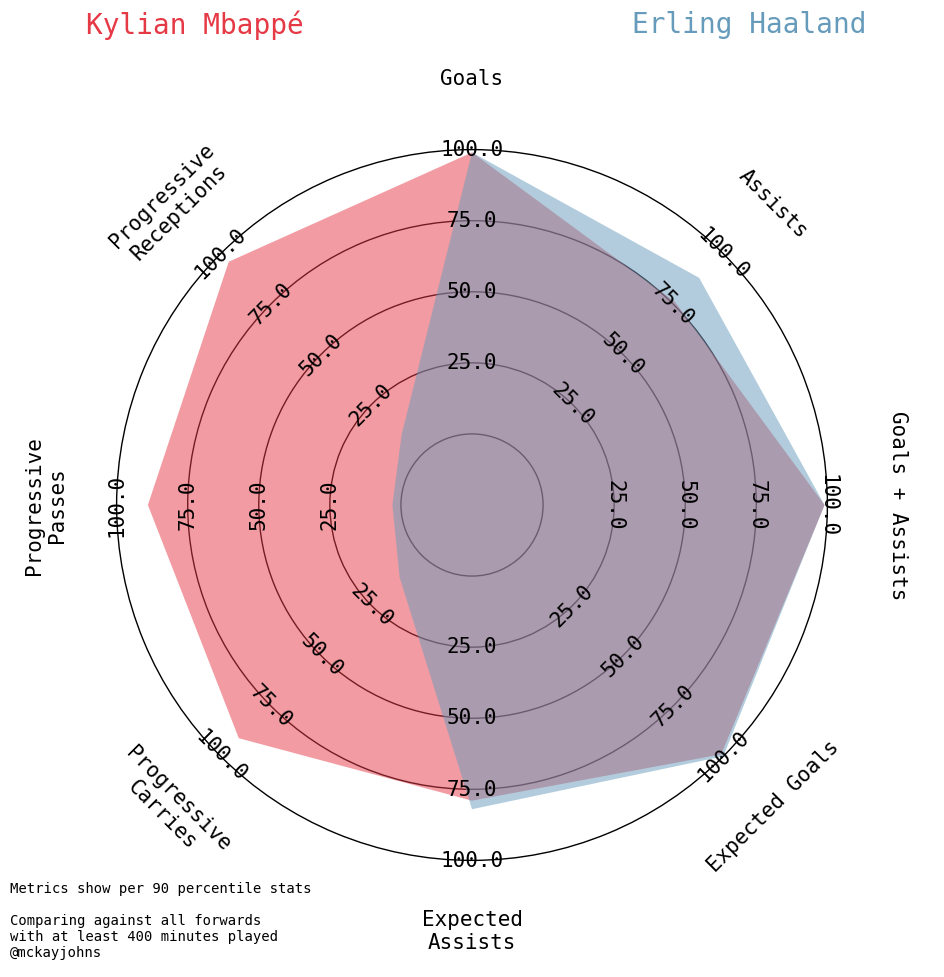

In [189]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar_compare(
    ax=ax,
    values=mbappe[columns_to_plot].values.flatten().tolist(),
    compare_values=haaland[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#e63946', 'alpha': 0.5},
    kwargs_compare={'facecolor': '#669bbc', 'alpha': 0.5}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)

param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.2, y=1.02, s='Kylian Mbappé', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#e63946'
)

ax.text(
    x=0.8, y=1.02, s='Erling Haaland', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#669bbc'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played\n@mckayjohns', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

# Now we can move to Pizza plots

A pizza plot is essentially a radar plot but with just a different style.

Personally I like them more than radar plots just because they are a little bit cleaner.

Luckily, the mplsoccer library has a pizza plot function that works very similarly to the radar plot function

In [190]:
from mplsoccer import PyPizza

# We will just use the same data we used for the radar plot

In [191]:
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#EFF0D1',
    straight_line_color='#000000',
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=0,
    other_circle_color='#000000',
    other_circle_ls='--'
)

Text(0.075, 0.005, 'data: statsbomb viz fbref\n@mckayjohns')

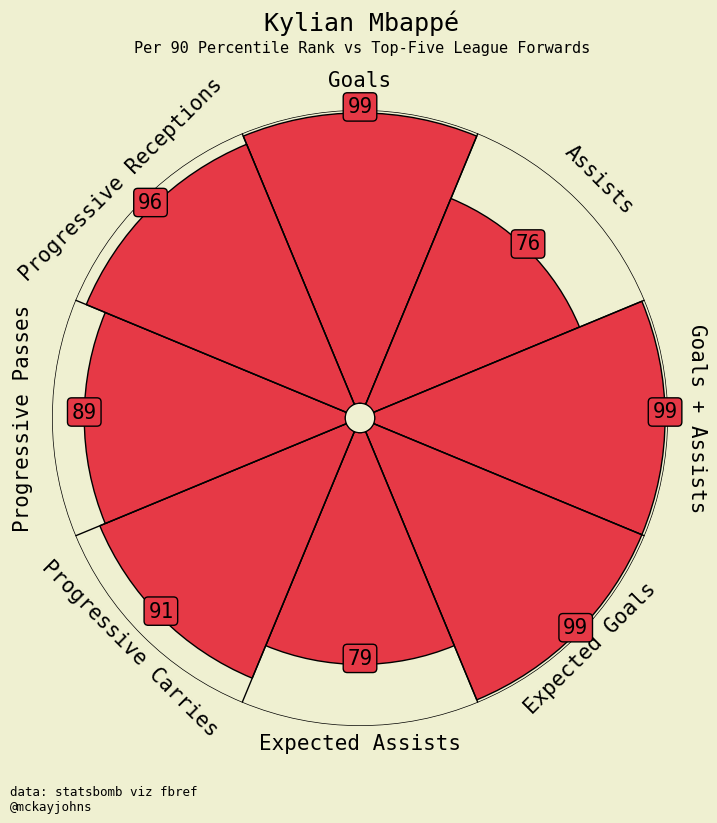

In [202]:
fig, ax = pizza.make_pizza(
    figsize=(8, 8),
    values=mbappe[columns_to_plot].values.flatten().tolist(),
    kwargs_slices=dict(
        facecolor='#e63946', edgecolor='#000000', linewidth=1
    ),
    kwargs_params=dict(
        color='#000000', fontsize=15, fontproperties="monospace"
    ),
    kwargs_values=dict(
        color='#000000', fontsize=15, fontproperties="monospace", 
        bbox = {
            "edgecolor": "#000000",
            "facecolor": "#e63946",
            "boxstyle": "round,pad=0.2",
            "lw": 1
        }
    )
)

# add title
fig.text(
    0.515, 0.98, "Kylian Mbappé", size=18,
    ha="center", fontfamily="monospace", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.952,
    "Per 90 Percentile Rank vs Top-Five League Forwards",
    size=11,
    ha="center", fontfamily="monospace", color="#000000"
)

CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "@mckayjohns"

fig.text(
    0.075, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontfamily="monospace", color="#000000",
    ha="left"
)

### There is a ton of customization that can be done with these plots and it would be impossible to cover all of it in this notebook.

You can check out the documentation here: https://mplsoccer.readthedocs.io/en/latest/

In [205]:
# save the radar plot
fig.savefig('/Users/mckayjohns/Desktop/pizza_plot.png', dpi=300, bbox_inches='tight')